## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [3]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [5]:
# Load the data into a pandas DataFrame
df = pd.DataFrame(diabetes_data)

# Review basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [7]:

columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_replace] = df[columns_to_replace].replace(0, np.nan)


df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


**<font color='teal'> Plot histograms of each column. </font>**

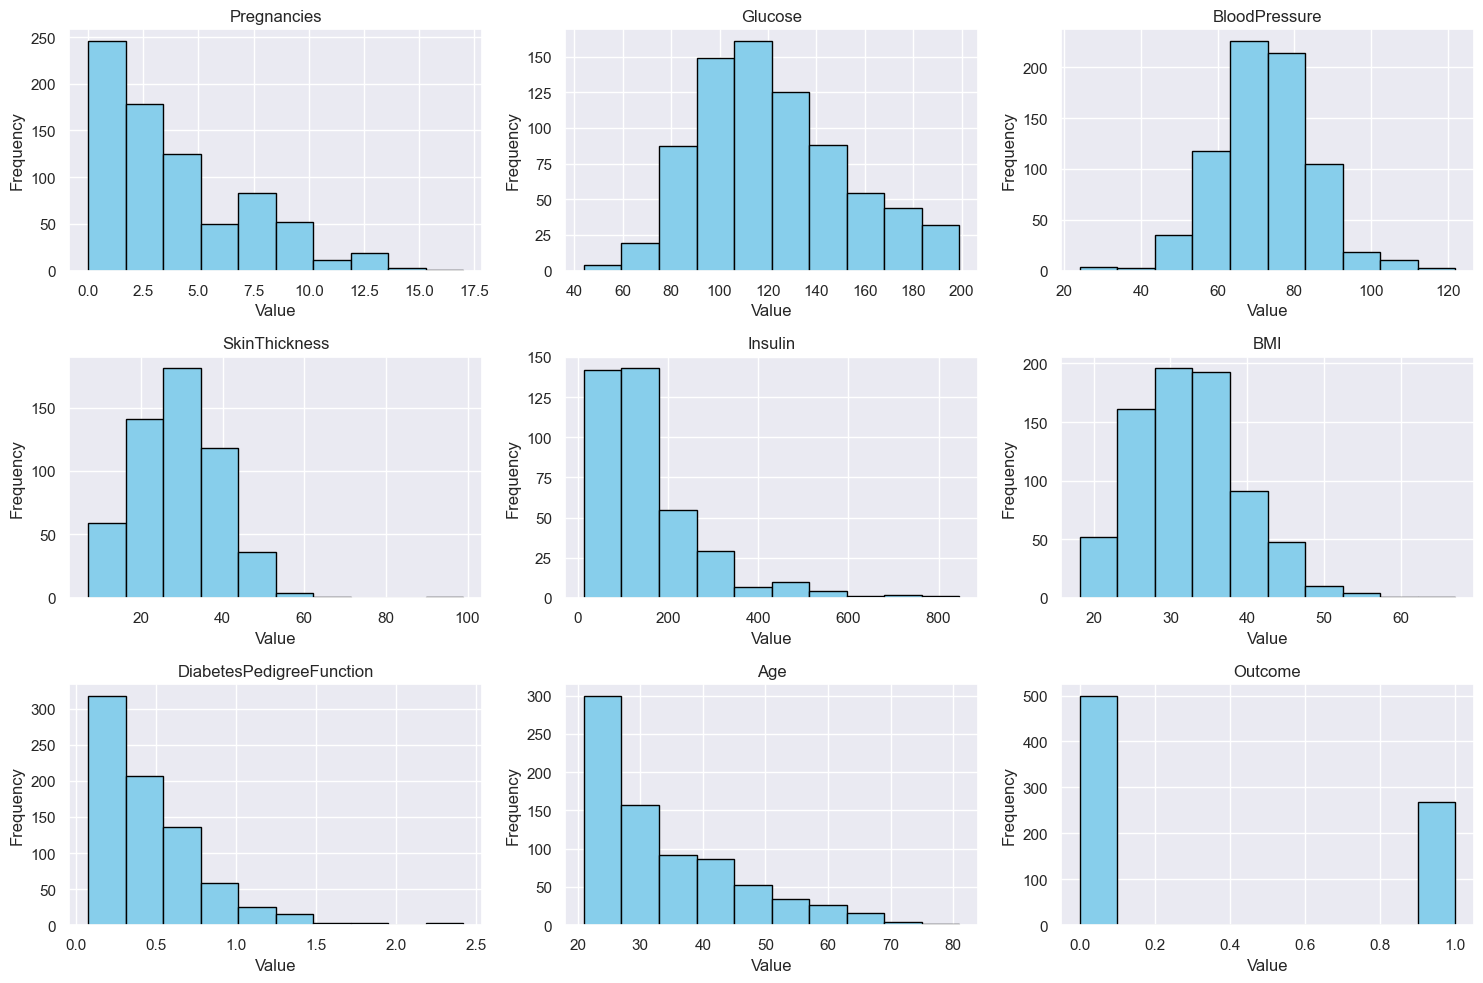

In [8]:
import matplotlib.pyplot as plt

# subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# histograms for each column
for i, column in enumerate(df.columns):
    axes[i].hist(df[column].dropna(), bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#### Replace the zeros with mean and median values.

In [9]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

/var/folders/yt/sy7z4yq9639_05r46b0x1gmm0000gn/T/ipykernel_20883/2273347448.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
/var/folders/yt/sy7z4yq9639_05r46b0x1gmm0000gn/T/ipykernel_20883/2273347448.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on 

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

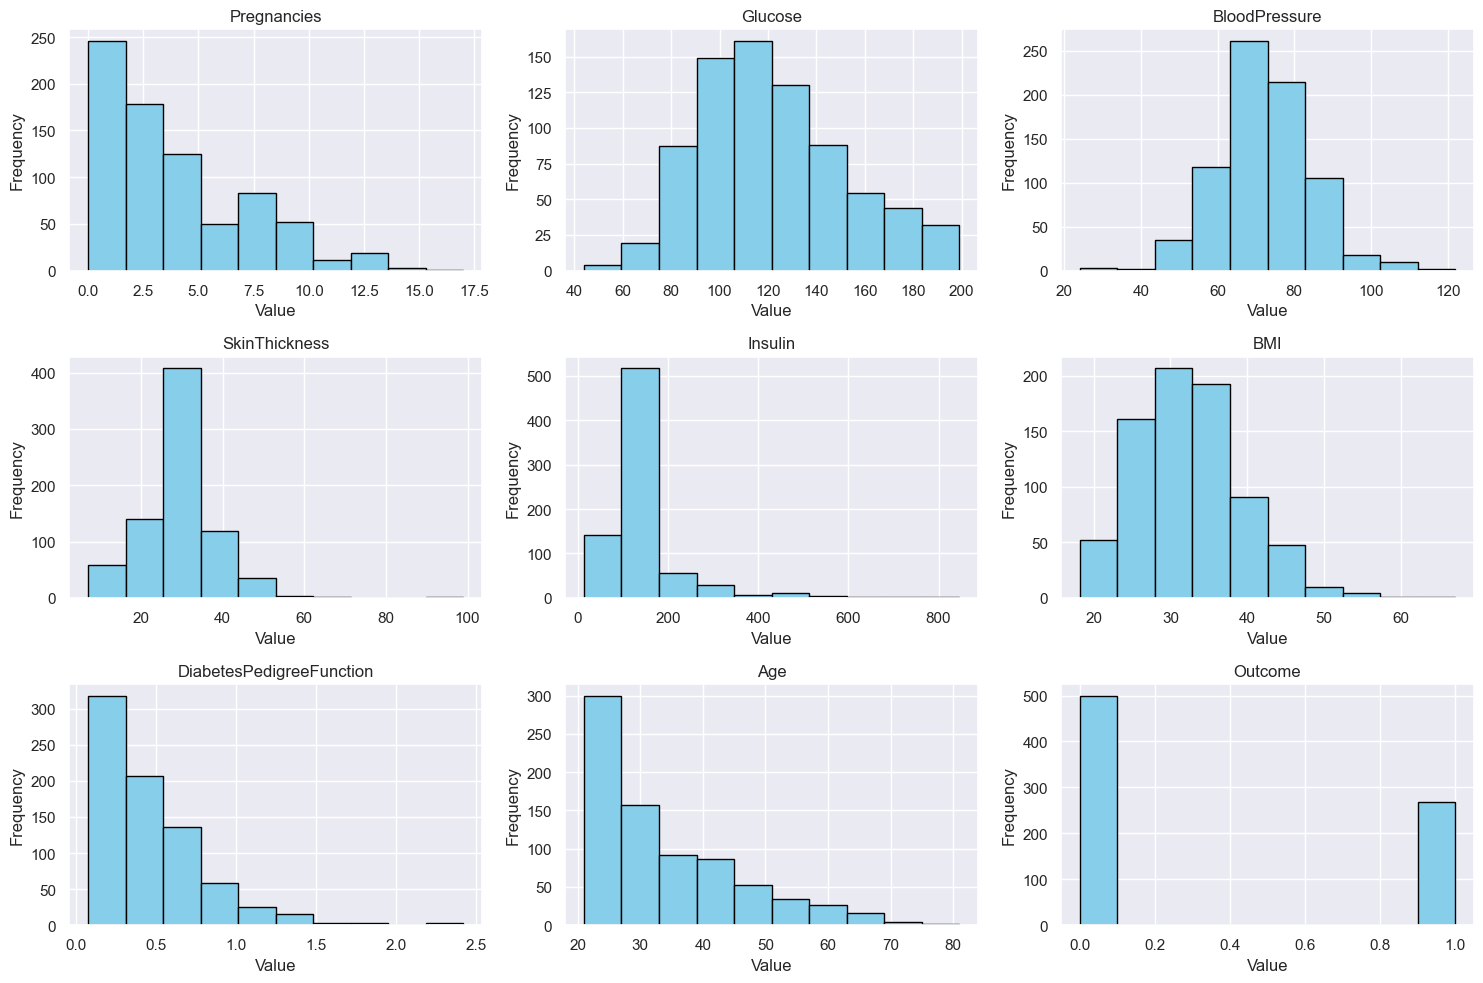

In [11]:
# Fill NaN values with the mean of each column for histogram plotting
df_filled = df.fillna(df.mean())

# subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# histograms for each column after replacing NaN
for i, column in enumerate(df_filled.columns):
    axes[i].hist(df_filled[column], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


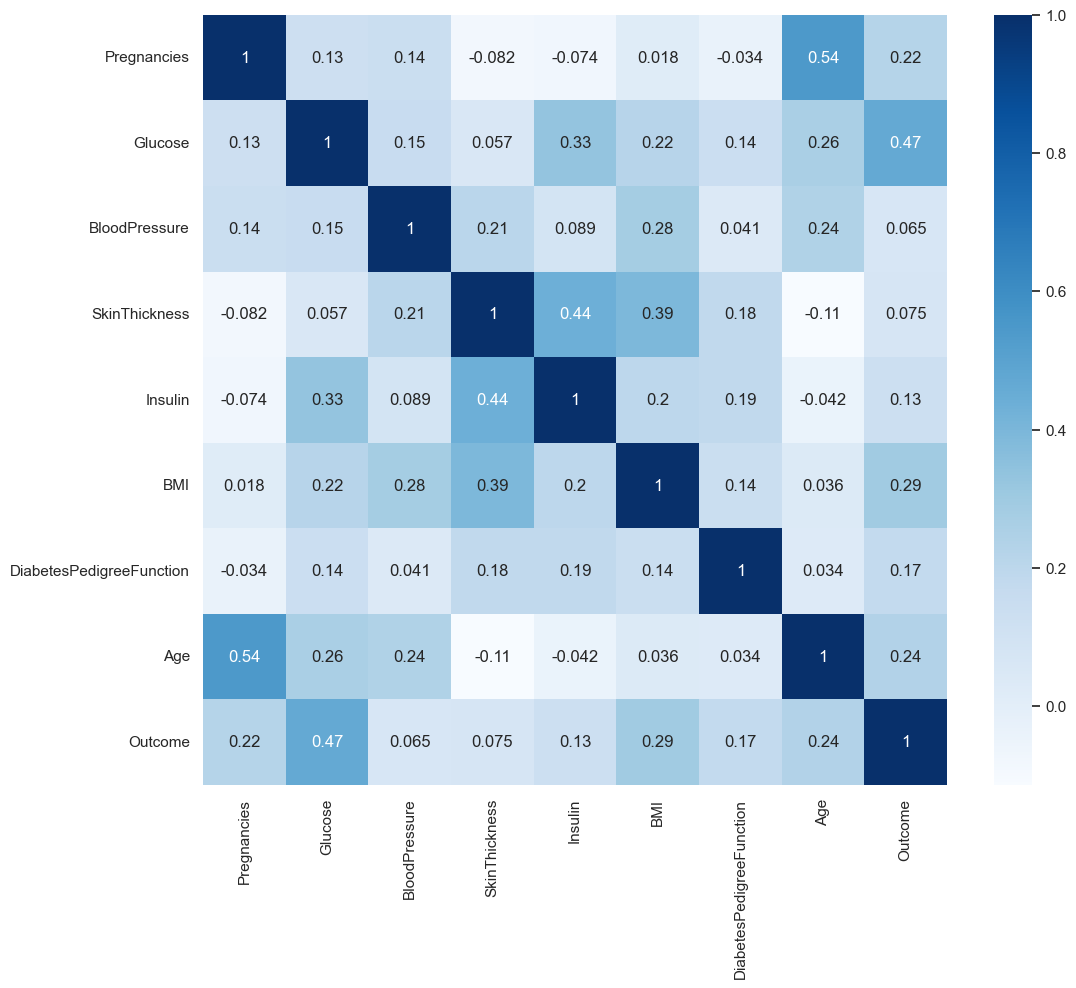

In [12]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [13]:
y = df['Outcome']

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)  # Drop the Outcome column to define X
y = df['Outcome']  # Define y as the Outcome column

# 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Initialize the StandardScaler
scaler = StandardScaler()

# scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# fitted scaler to transform the test data (without refitting)
X_test_scaled = scaler.transform(X_test)

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [28]:

# Impute missing values (replace NaN with column means)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)  # Fit on training data
X_test = imputer.transform(X_test)  # Apply the same transformation to test data

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNeighborsClassifier and evaluate performance
test_scores = []
train_scores = []

for i in range(1, 10):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    # Print the scores for the current iteration
    print(f"K = {i}: Train Score = {train_score:.4f}, Test Score = {test_score:.4f}")


K = 1: Train Score = 1.0000, Test Score = 0.6580
K = 2: Train Score = 0.8529, Test Score = 0.6926
K = 3: Train Score = 0.8641, Test Score = 0.6797
K = 4: Train Score = 0.8454, Test Score = 0.7143
K = 5: Train Score = 0.8454, Test Score = 0.7056
K = 6: Train Score = 0.8156, Test Score = 0.6883
K = 7: Train Score = 0.8361, Test Score = 0.7056
K = 8: Train Score = 0.8194, Test Score = 0.7273
K = 9: Train Score = 0.8156, Test Score = 0.7143


**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [29]:
See above

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

1 neighbor, k = 1

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

8 neighbors, k = 8

Plot the train and test model performance by number of neighbors.

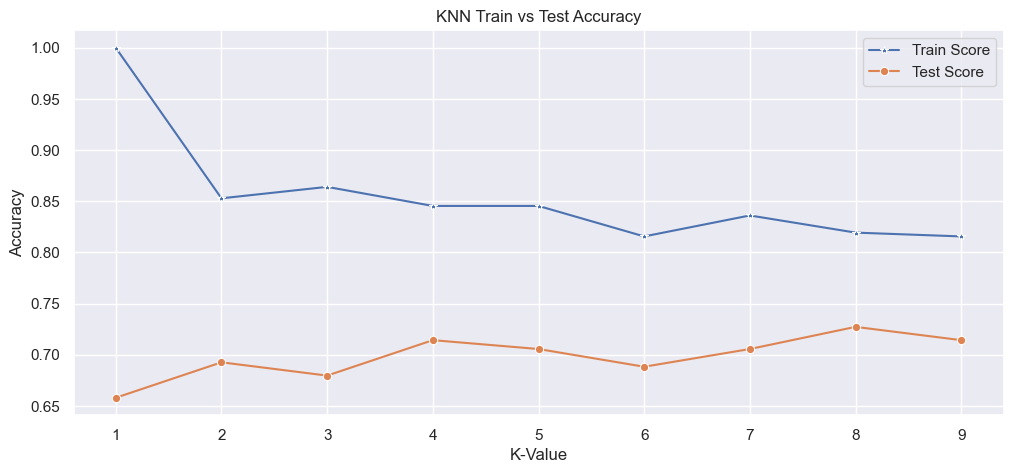

In [32]:

# Plotting the train and test scores
plt.figure(figsize=(12, 5))

# Line plot for train scores
sns.lineplot(x=range(1, 10), y=train_scores, marker='*', label='Train Score')

# Line plot for test scores
sns.lineplot(x=range(1, 10), y=test_scores, marker='o', label='Test Score')

# labels and title
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.title('KNN Train vs Test Accuracy')
plt.legend()
plt.show()

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [33]:
import numpy as np

# The K value that gave the best test score
best_k = np.argmax(test_scores) + 1  # Adding 1 because indexing starts from 0
print(f"Best K value based on test scores: {best_k}")

# Fitting the model using the best K value
best_knn = KNeighborsClassifier(best_k)
best_knn.fit(X_train, y_train)

# Scoreing the model on both training and testing data
train_score_best_k = best_knn.score(X_train, y_train)
test_score_best_k = best_knn.score(X_test, y_test)

# Print the results
print(f"Train Score with K={best_k}: {train_score_best_k:.4f}")
print(f"Test Score with K={best_k}: {test_score_best_k:.4f}")

Best K value based on test scores: 8
Train Score with K=8: 0.8194
Test Score with K=8: 0.7273


In [35]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

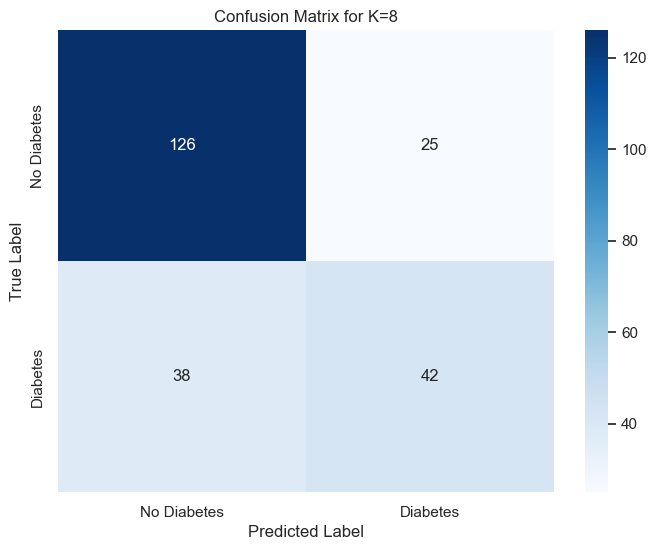

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predicting the labels using the best KNN model
y_pred = best_knn.predict(X_test)

# Computing the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title(f"Confusion Matrix for K={best_k}")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**<font color='teal'> Print the classification report </font>**

In [38]:
from sklearn.metrics import classification_report

# predictions using the best KNN model
y_pred = best_knn.predict(X_test)

# Printing| the classification report
report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes'])
print(report)

              precision    recall  f1-score   support

 No Diabetes       0.77      0.83      0.80       151
    Diabetes       0.63      0.53      0.57        80

    accuracy                           0.73       231
   macro avg       0.70      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [43]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Imputing missing values with the column mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Setting up GridSearchCV for KNeighborsClassifier
param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()

# Applying GridSearchCV with 5-fold cross-validation
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_scaled, y)

# Getting the best parameters and score
print(f"Best number of neighbors: {knn_cv.best_params_}")
print(f"Best cross-validation score: {knn_cv.best_score_}")

Best number of neighbors: {'n_neighbors': 25}
Best cross-validation score: 0.7748068924539513


#### Print the best score and best parameter for n_neighbors.

In [44]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7748068924539513
Best Parameters: {'n_neighbors': 25}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid (for the number of trees in the forest)
param_grid = {'n_estimators': np.arange(10, 200, 10)}

# Initializing the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Applying GridSearchCV to find the optimal number of estimators
rf_cv = GridSearchCV(rf, param_grid, cv=5)

# Fitting the model to the data (X_scaled is used from the previous step)
rf_cv.fit(X_scaled, y)

# Getting the best parameters and cross-validation score
print(f"Best number of estimators: {rf_cv.best_params_}")
print(f"Best cross-validation score: {rf_cv.best_score_}")

Best number of estimators: {'n_estimators': 80}
Best cross-validation score: 0.7656565656565656
